In [4]:
from president_speech.db.parquet_interpreter import read_parquet
import pandas as pd

In [5]:
df = read_parquet()
df.dtypes

division_number     int64
president          object
title              object
date               object
location           object
kind               object
speech_text        object
dtype: object

In [58]:
df['kind'].unique()

array(['취임사', '기념사', '신년사', '성명/담화문', '국회연설', '환영사', '기타', '만찬사', '축사',
       '회의'], dtype=object)

In [8]:
df['date'].head(1)

5368    1963.12.17
Name: date, dtype: object

In [10]:
# 날짜를 datetime 형식으로 변환
# df['date'] = pd.to_datetime(df['date']) #  ISO 8601 형식(예: YYYY-MM-DD) 일때
#df['date'] = pd.to_datetime(df['date'], format='%Y.%m.%d') #ValueError: time data "1964" doesn't match format "%Y.%m.%d", at position 3. You might want to try:


In [14]:
# 필터 조건: '.'이 없거나 길이가 10이 아닌 경우
invalid_dates = df[~df['date'].str.contains(r'\.', na=False) | (df['date'].str.len() != 10)]

for d in invalid_dates['date'].unique():
    print(d)

1964
1981.12
1982.02
1982.05
1993.03
1993.04
1993.06
1950
1951
1952
1953
1954
1955
1956
1957
1958
1948.11
1948.12
1948
1949.07
1950.02
1950.03
1950.04
1950.05
1952.01
1955.07
1955.10
1955.11
1956.01
1956.02
1956.03
1956.05
1956.12
1957.02
1992.02
1992.03
1992.04
1992.06



In [18]:
# 데이터 클린징
def parse_date(date):
    if(len(date) == 10):
        return pd.to_datetime(date, format='%Y.%m.%d')

    if(len(date) == 7):
        return pd.to_datetime(date, format='%Y.%m')

    if(len(date) == 4):
        return pd.to_datetime(date, format='%Y')

    return pd.NaT

df['dt'] = df['date'].apply(parse_date)
df.head(3)
    

,division_number,president,title,date,location,kind,speech_text,dt
5368,1305368,박정희,제5대 대통령 취임식 대통령 취임사,1963.12.17,국내,취임사,"\n\n\n단군성조가 천혜의 이 강토 위에 국기를 닦으신지 반만년, 연면히 이어온 ...",1963-12-17
5369,1305369,박정희,국회 개회식 치사,1963.12.17,국내,기념사,"존경하는 국회의장, 의원제위 그리고 내외귀빈 여러분! 오늘 이 뜻깊은 제3공화국의...",1963-12-17
5370,1305370,박정희,신년 메시지,1964.01.01,국내,신년사,친애하는 국내외의 동포 여러분! 혁명의 고된 시련을 겪고 민정이양으로 매듭을 지은...,1964-01-01


In [22]:
# 변환 실패한 날짜 확인
invalid_dt = df[df['dt'].isna()]
invalid_dt[['president', 'date', 'dt']]
# if not invalid_dates.empty:
#     print("잘못된 날짜 형식:")
#     print(invalid_dates[')

,president,date,dt
29880,이명박,,NaT
29882,이명박,,NaT
29886,이명박,,NaT
29887,이명박,,NaT
29888,이명박,,NaT
...,...,...,...
30095,이명박,,NaT
30096,이명박,,NaT
30097,이명박,,NaT
30705,이명박,,NaT


In [30]:
# 이명박 대통령 데이터만 필터링
mb_president_data = df[df['president'] == '이명박']

# 결측값이 있는 행
invalid_mb = mb_president_data[mb_president_data['dt'].isna()]

# 결측값이 아닌 행
valid_mb = mb_president_data[mb_president_data['dt'].notna()]

# 결측값과 결측값 아닌 비율 계산
invalid_ratio = len(invalid_mb) / len(mb_president_data) * 100
valid_ratio = len(valid_mb) / len(mb_president_data) * 100

print(f"이명박 대통령의 결측값 비율: {invalid_ratio:.2f}%")
print(f"이명박 대통령의 결측값 아닌 비율: {valid_ratio:.2f}%")

이명박 대통령의 결측값 비율: 20.25%
이명박 대통령의 결측값 아닌 비율: 79.75%


In [31]:
# 결측값이 아닌 이명박 대통령 데이터
valid_mb = mb_president_data[mb_president_data['dt'].notna()]

# 결측값 아닌 값들의 최대값과 최소값 계산
max_date = valid_mb['dt'].max()
min_date = valid_mb['dt'].min()

print(f"이명박 대통령의 dt 열에서 결측값 아닌 최대값: {max_date}")
print(f"이명박 대통령의 dt 열에서 결측값 아닌 최소값: {min_date}")

이명박 대통령의 dt 열에서 결측값 아닌 최대값: 2013-02-07 00:00:00
이명박 대통령의 dt 열에서 결측값 아닌 최소값: 2008-02-25 00:00:00


In [32]:
# 결측값이 있는 대통량의 유니크
invalid_dt['president'].unique()

array(['이명박'], dtype=object)

In [70]:
df['year'] = df['dt'].dt.year.astype('Int64')
# df['year'] = df['dt'].dt.year.fillna(0).astype(int)
df.head(1)['year']

5368    1963
Name: year, dtype: Int64

In [71]:
df.dtypes

division_number              int64
president                   object
title                       object
date                        object
location                    object
kind                        object
speech_text                 object
dt                  datetime64[ns]
year                         Int64
dt_isna                      int64
freedom_mentions             int64
dtype: object

### 주요 차이점 요약


| **특징**                | `.astype(int)`                  | `.astype('Int64')`                 |
|-------------------------|--------------------------------|-----------------------------------|
| **결측값 처리**          | `NaN`이 있으면 오류 발생         | `NaN`을 허용하며 `<NA>`로 유지      |
| **사용 시점**            | 모든 값이 유효한 숫자일 때 사용    | 결측값을 포함한 데이터를 처리할 때 사용 |
| **데이터 타입**          | 표준 Python 정수(`int64`)       | pandas Nullable Integer (`Int64`) |
| **호환성**              | Python의 표준 연산과 호환         | `pandas`에서 더 유연하게 사용 가능    |


In [33]:
# 결정 - 이명박 데이터는 날짜가 빠신 곳은 중간 중간 있다
# import pandas as pd
# import numpy as np
# import random

# # 이명박 대통령 재임 기간
# start_date = pd.to_datetime("2008-02-25")
# end_date = pd.to_datetime("2013-02-25")

# # 랜덤 날짜 생성 함수
# def random_date_in_range(start, end):
#     random_timestamp = random.randint(start.value, end.value)
#     return pd.to_datetime(random_timestamp)

# # 결측값이 있는 경우 랜덤 날짜를 채우기
# df['dt'] = df['dt'].apply(
#     lambda x: random_date_in_range(start_date, end_date) if pd.isna(x) else x
# )

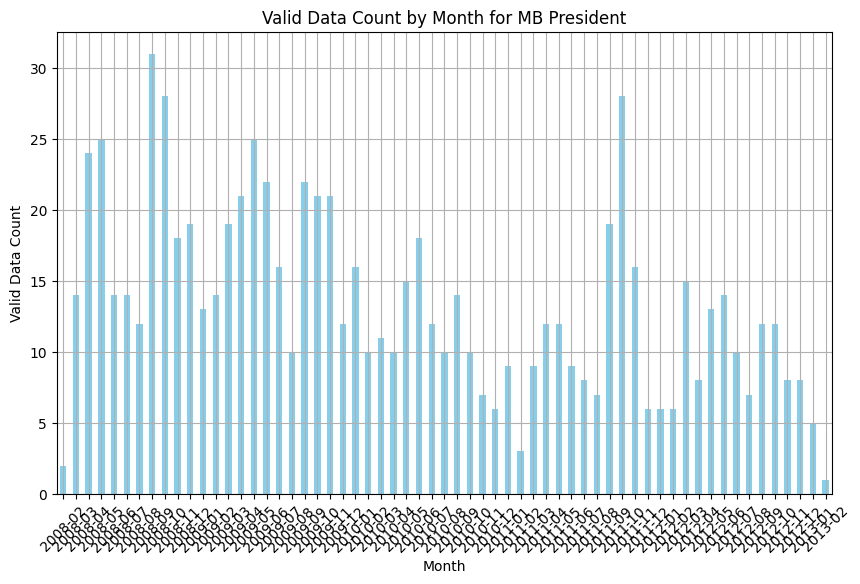

In [41]:
# 중간에 빠진 것이 있을까 확인
import matplotlib.pyplot as plt

# 이명박 대통령 데이터만 필터링
mb_president_data = df[df['president'] == '이명박']

# 결측값이 아닌 데이터만 필터링
valid_mb_data = mb_president_data[mb_president_data['dt'].notna()].copy()  # 복사본 생성

# 'dt' 열을 월 단위로 변환 (loc를 사용)
valid_mb_data.loc[:, 'month'] = valid_mb_data['dt'].dt.to_period('M')

# 월별 정상적인 데이터 갯수 계산
count_by_month = valid_mb_data.groupby('month').size()

# 바 차트 그리기
plt.figure(figsize=(10, 6))
count_by_month.plot(kind='bar', color='skyblue')

plt.title('Valid Data Count by Month for MB President')
plt.xlabel('Month')
plt.ylabel('Valid Data Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [63]:
# TODO 자유 말고 다른건?
keyword = "핵무기"

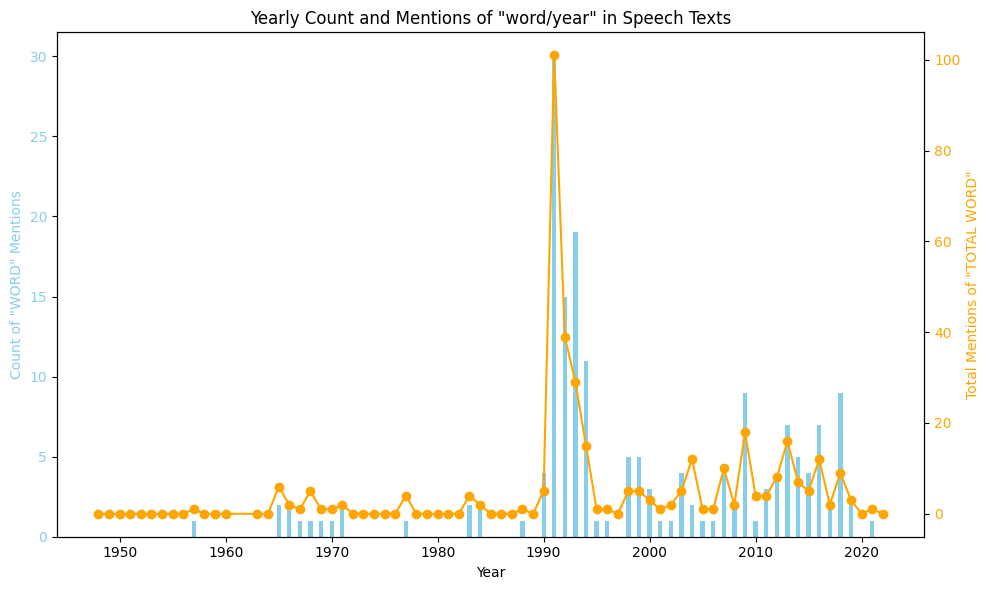

In [64]:
import matplotlib.pyplot as plt

# 'dt' 열을 연도로 변환
# df['year'] = df['dt'].dt.year

# 'speech_text' 열에서 '자유'라는 단어가 포함된 행을 필터링
df['freedom_mentions'] = df['speech_text'].str.count(keyword)

# 연도별로 "자유" 단어가 포함된 행의 수 (count)와 "자유"라는 단어가 언급된 횟수 (total_mentions)
count_by_year = df.groupby('year')['freedom_mentions'].apply(lambda x: (x > 0).sum())  # '자유'가 포함된 행의 수
total_mentions_by_year = df.groupby('year')['freedom_mentions'].sum()  # '자유' 단어가 언급된 총 횟수

# 두 그래프를 하나의 차트에 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 자유 단어가 포함된 행의 수를 첫 번째 y축에 나타냄
ax1.bar(count_by_year.index, count_by_year, width=0.4, color='skyblue', label="Count of 'word' Mentions", align='center')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of "WORD" Mentions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 두 번째 y축 생성 (자유 단어 언급 횟수)
ax2 = ax1.twinx()
ax2.plot(total_mentions_by_year.index, total_mentions_by_year, color='orange', marker='o', label="Total Mentions of 'word'")
ax2.set_ylabel('Total Mentions of "TOTAL WORD"', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목과 라벨 설정
plt.title('Yearly Count and Mentions of "word/year" in Speech Texts')
fig.tight_layout()

# 그래프 표시
plt.show()